# Baseball Project



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Baseball/baseball.csv'
df = pd.read_csv(url)

df.head()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
print('Number of columns: ',df.shape[0])
print('Number of Rows:  ',df.shape[1])

Number of columns:  30
Number of Rows:   17


In [6]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
df.rename(columns={'W' : 'Wins',  'R' : 'Runs Scored', 'AB' : 'At Bat', 'H' : 'Hits', '2B' : 'Doubles','3B' : 'Triples','HR' : 'Home Runs', 'BB' : 'Base on Balls', 'SO' : 'Strike Outs','SB' : 'Stolen Base','RA' : 'Runs Average', 'ER' : 'Earned Runs', 'ERA' : 'Earned Run Average',  'CG' : 'Complete Game','SHO' : 'Shut Outs', 'SV' : 'Saves',  'E' : 'Errors'}, inplace=True)
df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [8]:
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

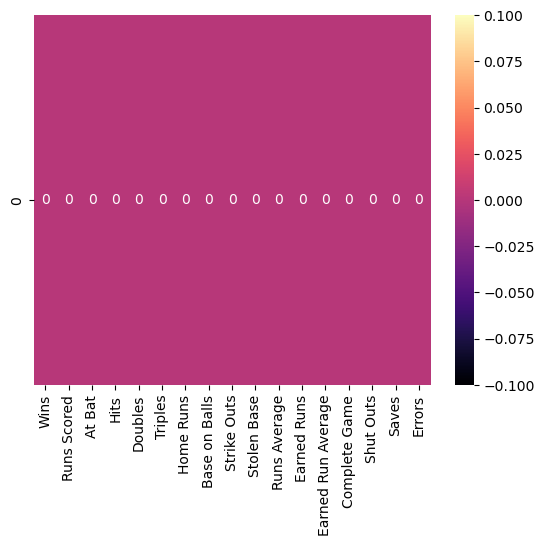

In [9]:
sns.heatmap(df.isnull().sum().to_frame().T, annot=True,cmap='magma')
plt.show()

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs Scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home Runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base on Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike Outs,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


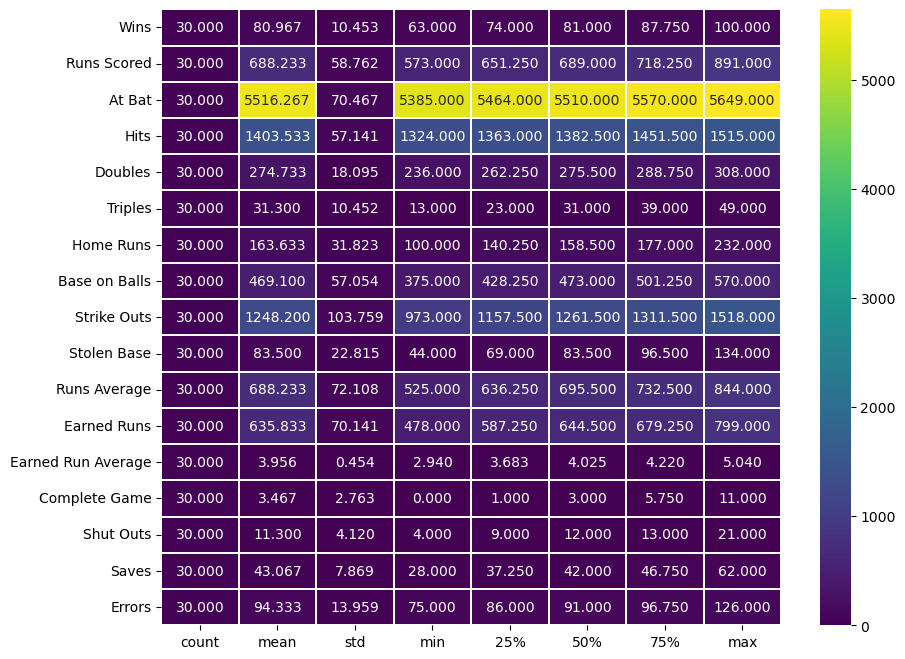

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.describe().T, linewidth=0.2, fmt='0.3f', annot=True, cmap='viridis')
plt.show()

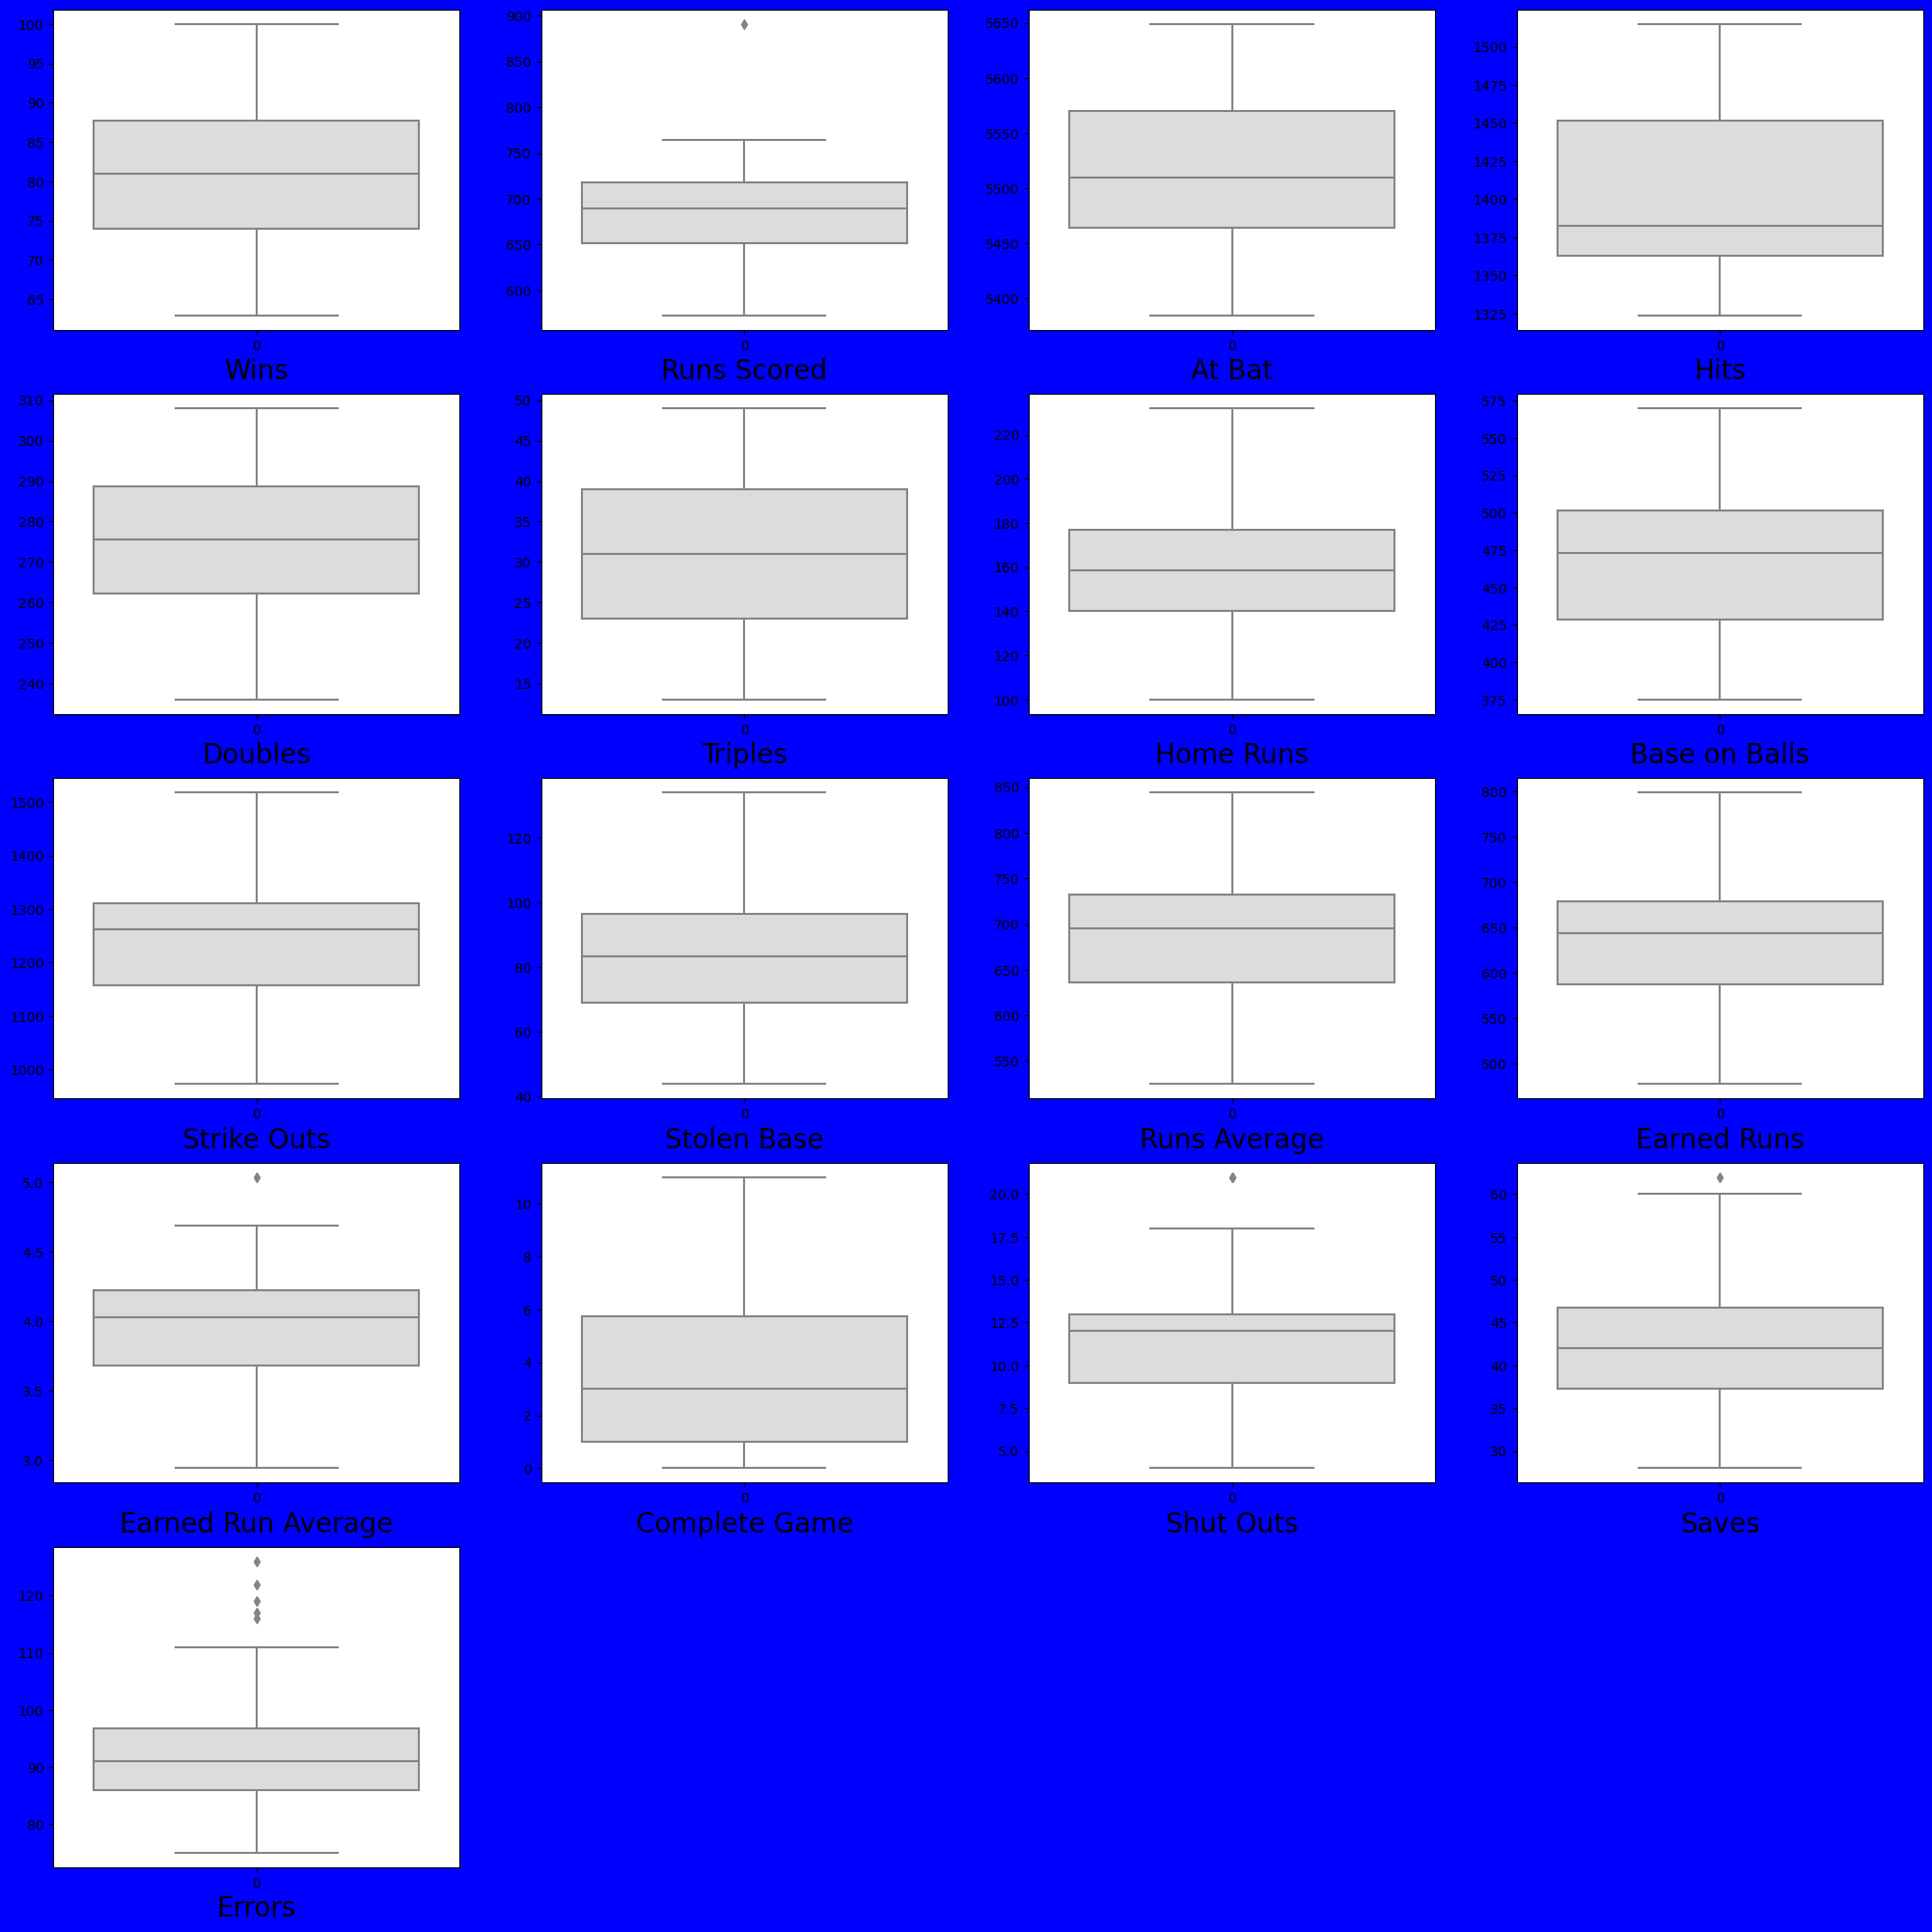

In [12]:
plt.figure(figsize=(25,25),facecolor='blue')
index=1
for column in df:
    if index <=17:
        ax = plt.subplot(5,4,index)
        sns.boxplot(df[column], palette='coolwarm')
        plt.xlabel(column,fontsize=20)
    index+=1
plt.show()

In [13]:
z_scores = np.abs(zscore(df))

threshold = 2

df1 = df[(z_scores < threshold).all(axis=1)]

In [14]:
print('Shape of dataset after removing outliers :',df1.shape)

Shape of dataset after removing outliers : (15, 17)


In [15]:
print('Percentage Data Loss :',((30-29)/30)*100,'%')

Percentage Data Loss : 3.3333333333333335 %


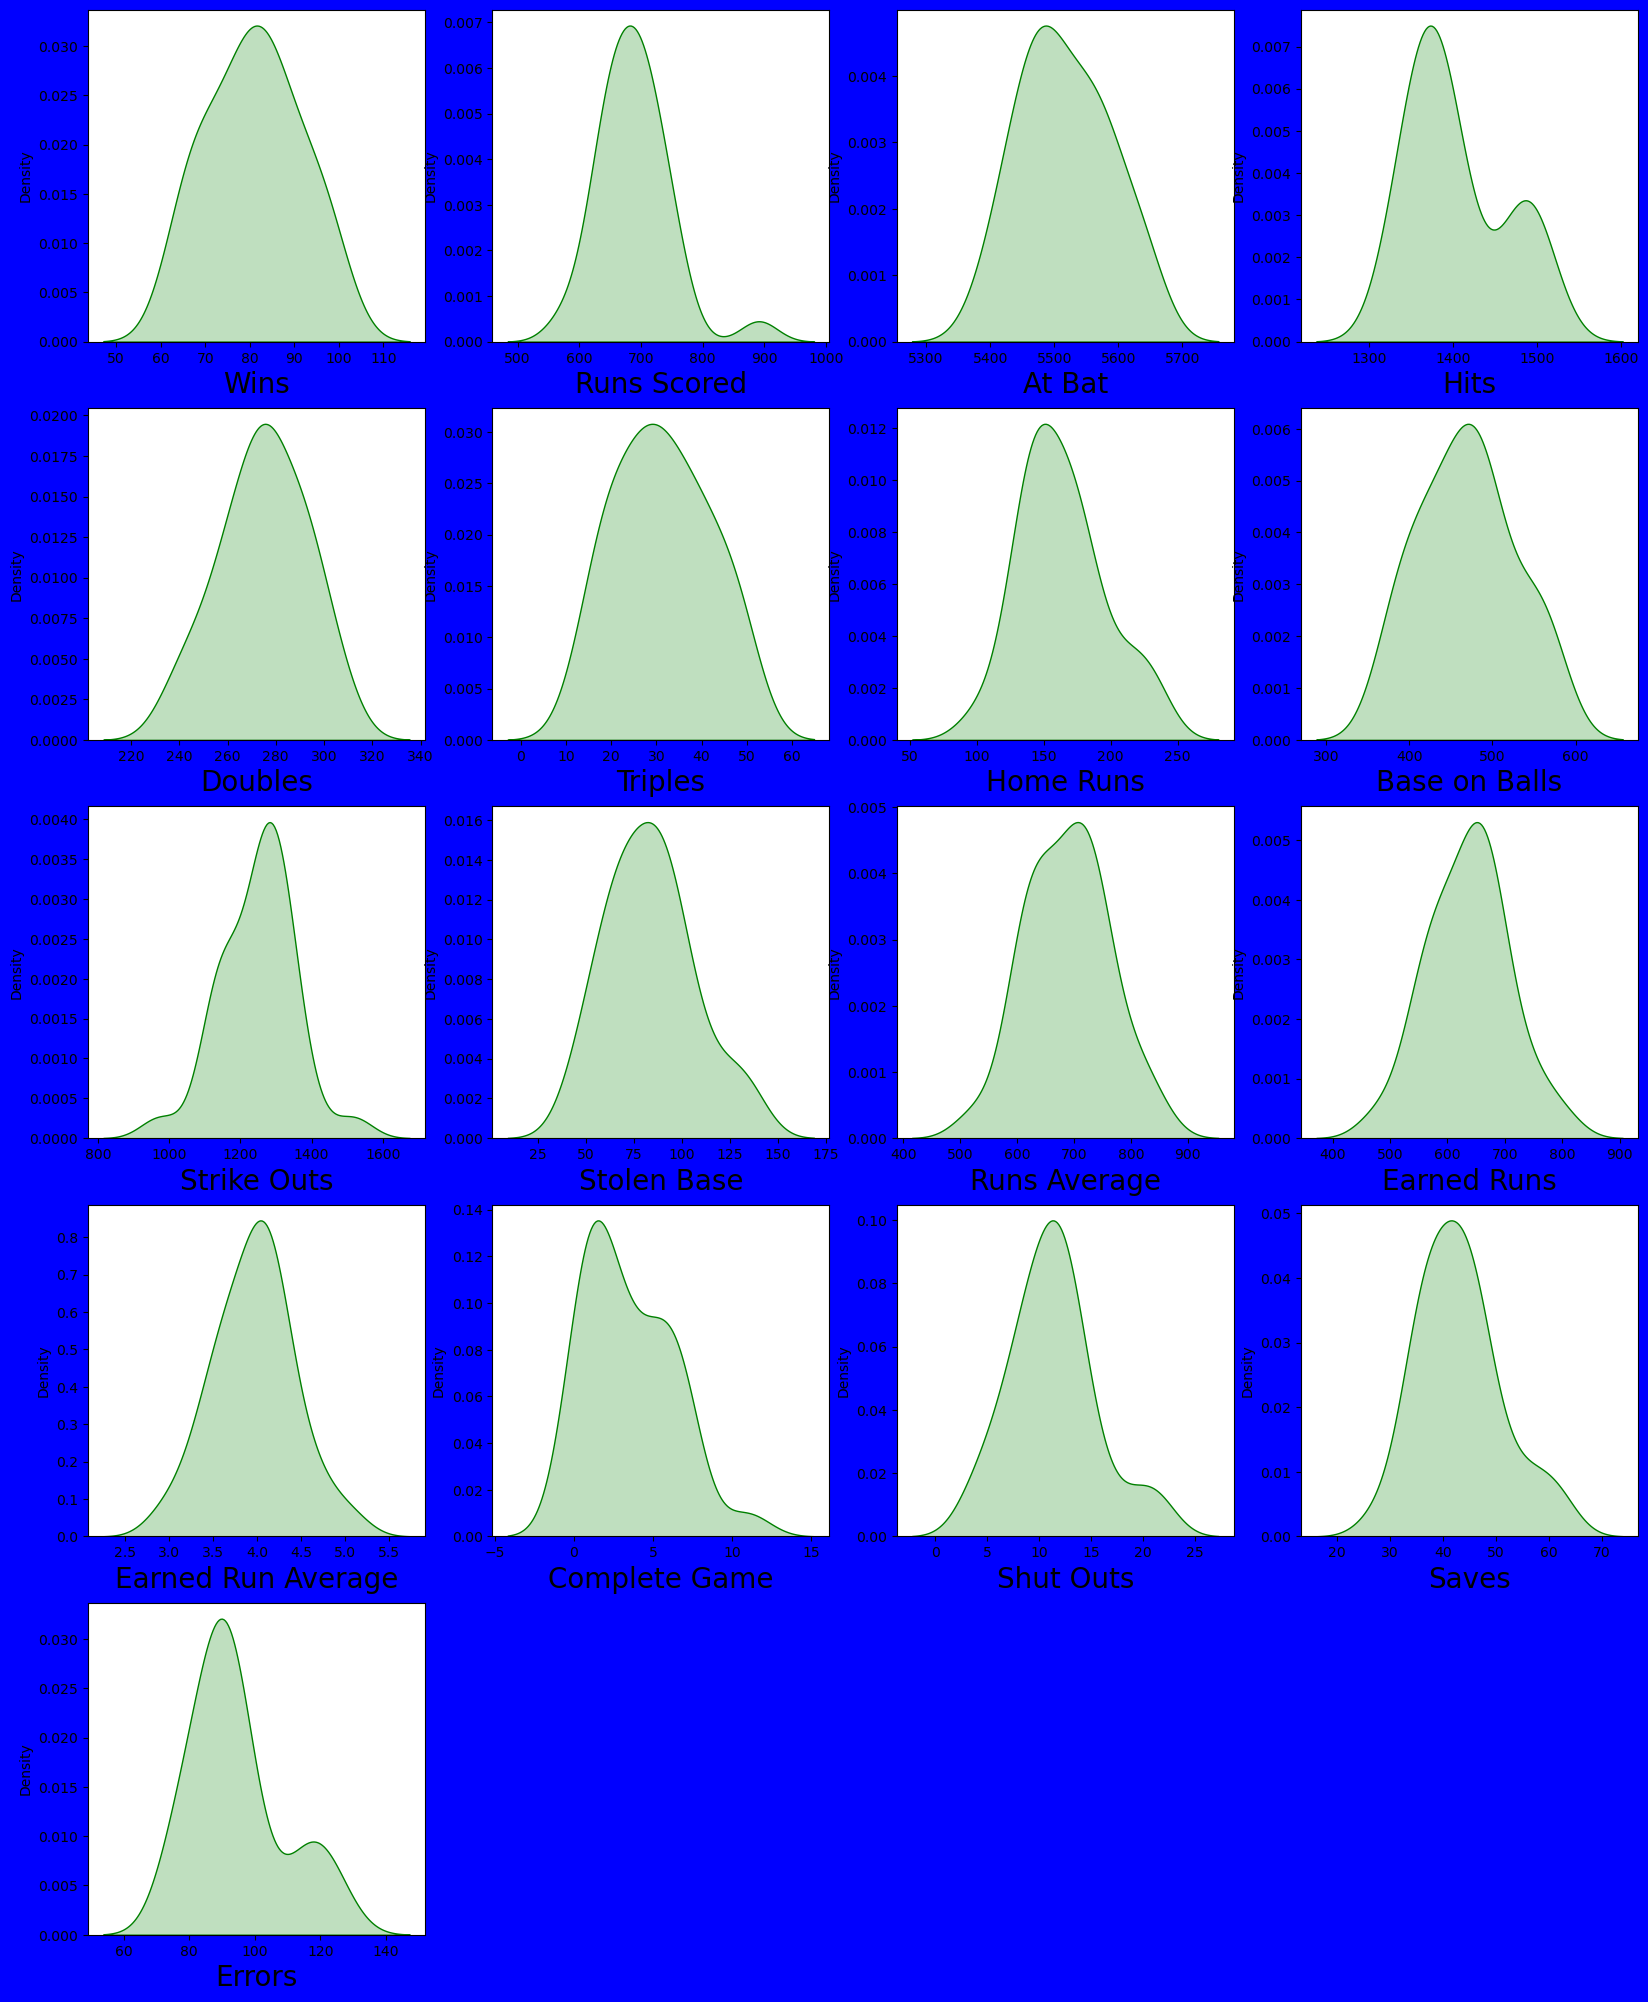

In [16]:
plt.figure(figsize=(20,25), facecolor='blue')
plotnumber=1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df[column], color='g',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [17]:
df1.skew()

Wins                 -0.657005
Runs Scored           0.288208
At Bat                0.223697
Hits                  1.086216
Doubles              -0.232779
Triples               0.171365
Home Runs             0.584974
Base on Balls         0.574946
Strike Outs          -0.475002
Stolen Base           0.026589
Runs Average          0.038950
Earned Runs          -0.023698
Earned Run Average   -0.023760
Complete Game         0.418484
Shut Outs             0.228935
Saves                -0.062615
Errors                0.741043
dtype: float64

In [18]:
df1.columns

Index(['Wins', 'Runs Scored', 'At Bat', 'Hits', 'Doubles', 'Triples',
       'Home Runs', 'Base on Balls', 'Strike Outs', 'Stolen Base',
       'Runs Average', 'Earned Runs', 'Earned Run Average', 'Complete Game',
       'Shut Outs', 'Saves', 'Errors'],
      dtype='object')

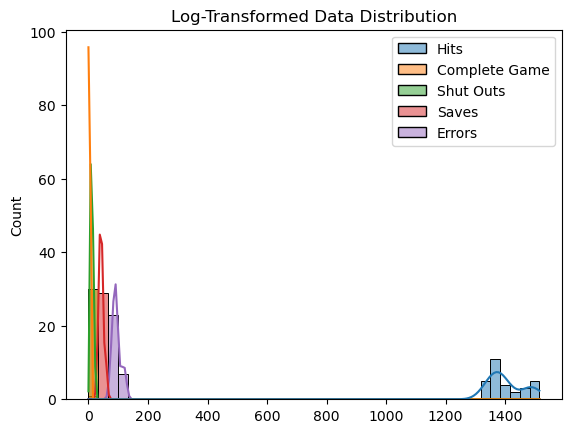

In [19]:
column_name = ['Hits','Complete Game','Shut Outs', 'Saves', 'Errors']

df1[column_name] = np.log1p(df[column_name])

# Plot the transformed data to check for skewness
sns.histplot(df[column_name], kde=True)
plt.title('Log-Transformed Data Distribution')
plt.show()


In [20]:
df1.skew()

Wins                 -0.657005
Runs Scored           0.288208
At Bat                0.223697
Hits                  1.033838
Doubles              -0.232779
Triples               0.171365
Home Runs             0.584974
Base on Balls         0.574946
Strike Outs          -0.475002
Stolen Base           0.026589
Runs Average          0.038950
Earned Runs          -0.023698
Earned Run Average   -0.023760
Complete Game        -0.326699
Shut Outs            -0.691774
Saves                -0.262667
Errors                0.499311
dtype: float64

<Axes: >

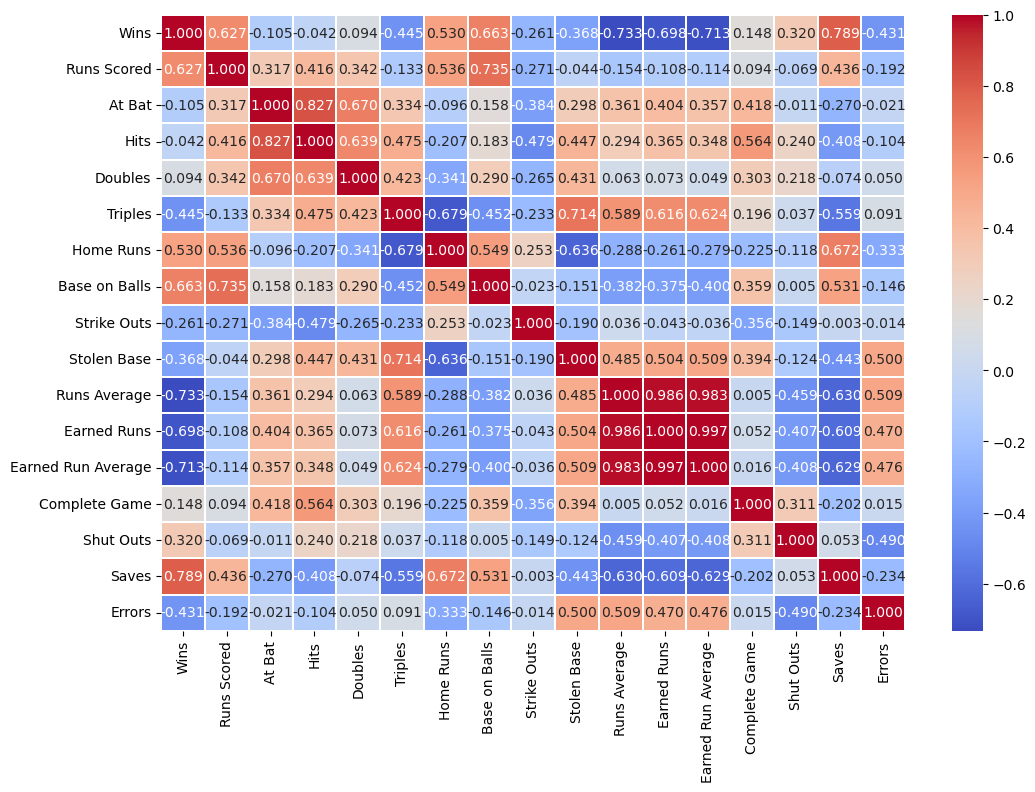

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),linewidth=0.1,fmt='0.3f',annot=True,cmap='coolwarm')

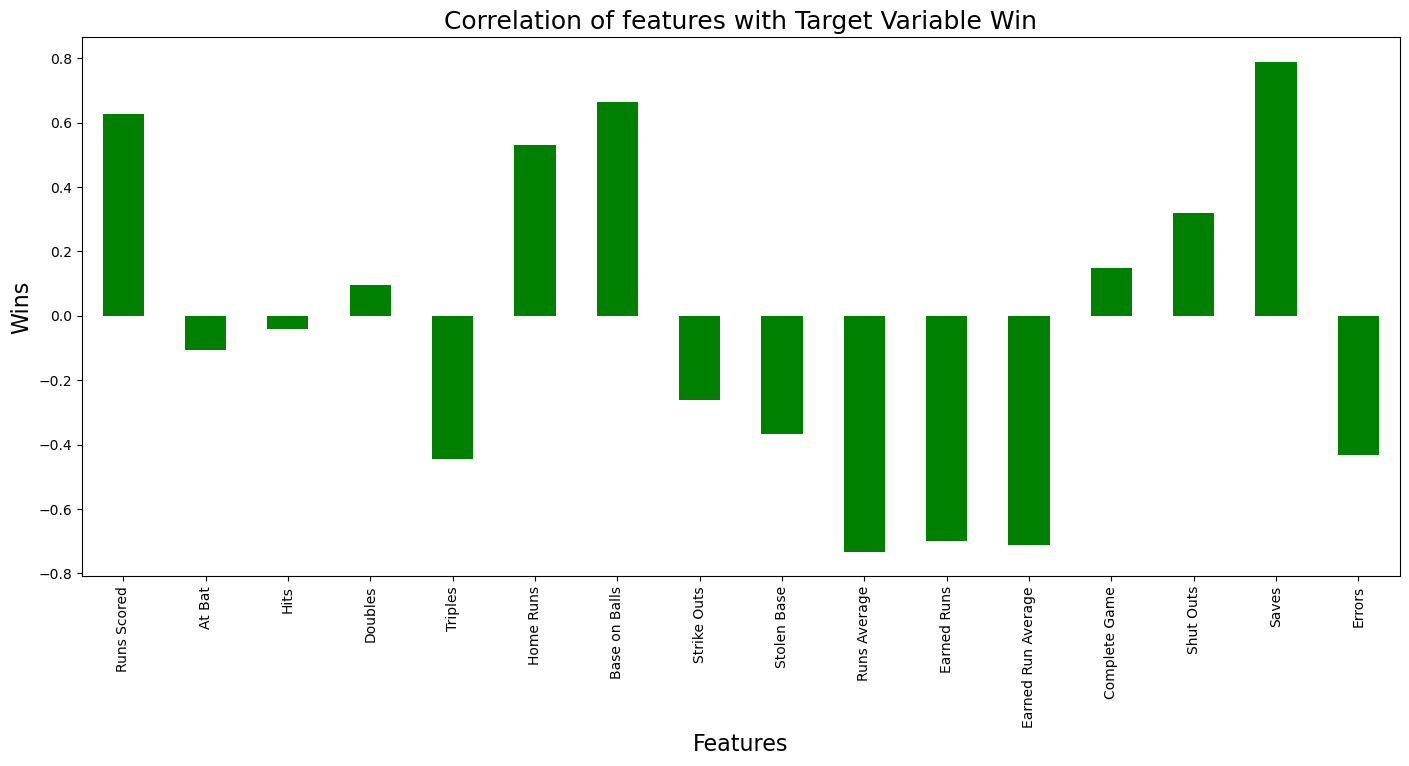

In [22]:
plt.figure(figsize = (17,7))
df1.corr()['Wins'].drop(['Wins']).plot(kind='bar',color = 'g')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Wins',fontsize=16)
plt.title('Correlation of features with Target Variable Win',fontsize = 18)
plt.show()

In [23]:
#Checking multicollinearity using Varience-inflation-factor (VIF)
vif= pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df.shape[1])]
vif['Features'] = df1.columns
vif

,VIF,Features
0,inf,Wins
1,inf,Runs Scored
2,inf,At Bat
3,inf,Hits
4,inf,Doubles
5,inf,Triples
6,inf,Home Runs
7,inf,Base on Balls
8,inf,Strike Outs
9,inf,Stolen Base


In [24]:
X=df1.iloc[:,1:-1]
y=df1.iloc[:,0]

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [26]:
X_scaled=scaler.fit_transform(X)

In [27]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [28]:
X_=pd.DataFrame(X_pca,columns=np.arange(15))

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Features List"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X_.values, i)
                          for i in range(len(X_.columns))]
vif_data

,Features List,VIF Value
0,Runs Scored,1.0
1,At Bat,1.0
2,Hits,1.0
3,Doubles,1.0
4,Triples,1.0
5,Home Runs,1.0
6,Base on Balls,1.0
7,Strike Outs,1.0
8,Stolen Base,1.0
9,Runs Average,1.0


In [30]:
X_.skew()

0     0.213835
1     0.049790
2     0.254114
3    -0.010432
4     0.517333
5     0.098777
6     0.132224
7     0.405181
8     0.360825
9     0.415790
10    0.368288
11    0.693916
12   -0.074498
13    0.306424
14    0.000000
dtype: float64

In [31]:
lr=LinearRegression()

In [32]:
maxR2_score=0
maxRS=0
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=i, test_size=.2)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
        
print('Best R2 Score is: ', (maxR2_score)*100 ,'\nAt Random State: ', maxRS)

Best R2 Score is:  39.75074984472485 
At Random State:  12


In [33]:
pred_data=pd.DataFrame({'predicted values':y_pred,'actual values':y_test})
pred_data

,predicted values,actual values
3,67.068014,76
24,56.454536,63
21,115.735136,83


In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print('\033[1m'+' Error :'+'\033[0m')
print('\nMean absolute error:',mean_absolute_error(y_test,y_pred))
print('\nMean squared error:',mean_squared_error(y_test,y_pred))
print('\nRoot Mean Sqaured Error:',np.sqrt(mean_squared_error(y_test,y_pred)))

 Error :

Mean absolute error: 16.07086188994353

Mean squared error: 398.07086294806646

Root Mean Sqaured Error: 19.951713283526967


In [35]:
lgr=LogisticRegression()

In [36]:
maxR2_score=0
maxRS=0
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=i, test_size=.2)
    lgr.fit(X_train,y_train)
    y_pred1=lgr.predict(X_test)
    R2=r2_score(y_test,y_pred1)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
        
print('Best R2 Score is: ', (maxR2_score)*100 ,'\nAt Random State: ', maxRS)

Best R2 Score is:  90.72164948453609 
At Random State:  150


In [37]:
pred_data1=pd.DataFrame({'predicted values':y_pred1,'actual values':y_test})
pred_data1

,predicted values,actual values
3,74,76
24,74,63
21,90,83


In [38]:
dtc=DecisionTreeClassifier()

In [39]:
maxR2_score=0
maxRS=0
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=i, test_size=.2)
    dtc.fit(X_train,y_train)
    y_pred2=dtc.predict(X_test)
    R2=r2_score(y_test,y_pred2)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
        
print('Best R2 Score is: ', (maxR2_score)*100 ,'\nAt Random State: ', maxRS)

Best R2 Score is:  82.1852731591449 
At Random State:  40


In [40]:
pred_data2=pd.DataFrame({'predicted values':y_pred2,'actual values':y_test})
pred_data2

,predicted values,actual values
3,81,76
24,68,63
21,85,83


In [41]:
from sklearn.model_selection import GridSearchCV
lr=LinearRegression()
param={'fit_intercept' : [True, False],
              'copy_X' : [True, False],
              'positive' : [True, False],
              'n_jobs' : [-2, -1, 1]
             }


In [42]:
gsv=GridSearchCV(lr,param,cv=5)

In [43]:
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'positive': [True, False]})

In [44]:
gsv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -2, 'positive': False}

In [45]:
model = LinearRegression(fit_intercept= True, copy_X= True, n_jobs= -2, positive= False)

In [46]:
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('R2 score: ',r2_score(y_test,pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred))
print('Mean Squared Error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred)))

R2 score:  -4.7971484895349485
Mean Absolute Error:  16.07086188994353
Mean Squared Error:  398.07086294806646
Root Mean Squared Error:  19.951713283526967


In [47]:
prediction_=pd.DataFrame({'predicted values':pred,'actual values':y_test})
prediction_

,predicted values,actual values
3,67.068014,76
24,56.454536,63
21,115.735136,83
